## SARCASM DETECTION ON YOUTUBE COMMENTS

### 1.Problem Statement:
Detecting sarcasm in YouTube comments is crucial for accurate sentiment analysis. Sarcasm often conveys the opposite of its literal meaning, making it difficult for traditional NLP methods to interpret accurately. This misinterpretation can lead to poor content moderation and incorrect understanding of user sentiment.

### 2.Solution Description:
Develop a machine learning model using TF-IDF vectorization and a Dense Neural Network (DNN) to classify YouTube comments as sarcastic or non-sarcastic. This solution aims to improve the accuracy of sentiment analysis by effectively detecting sarcasm in user comments.

### 3.Dataset Description:
The dataset comprises around 20,000 preprocessed YouTube comments labeled as sarcastic (1) or non-sarcastic (0). It is divided into training and test sets for model development and evaluation.

### 4.Data Visualization

**Label-wise Distribution in Training Data:**

Non-sarcastic (0): 11056  comments

Sarcastic (1): 8405 comments

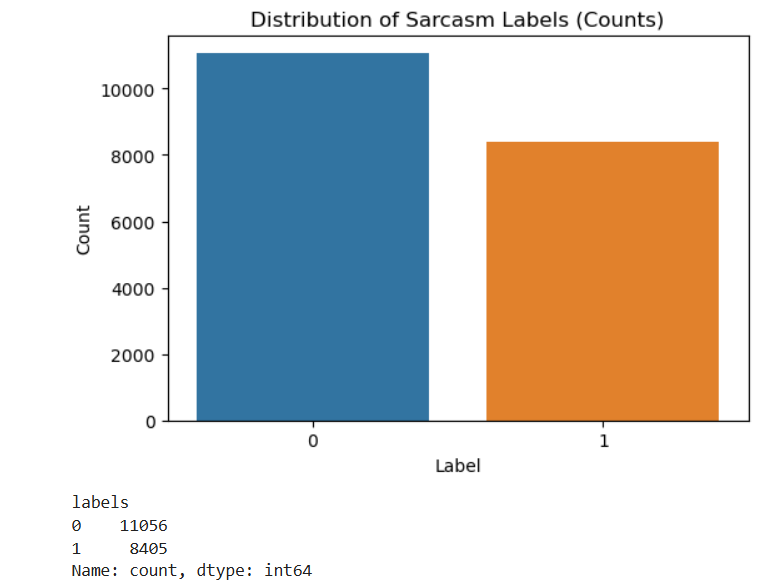

Training set shape: (15568, 5000)

Testing set shape: (3893, 5000)

### 5.Plot the Confusion Matrix and Classification Report of your best mode

**Model Architecture:**

**Dense Neural Network (DNN)**

A Dense Neural Network (DNN) consists of multiple layers where information flows in one direction, from input nodes through intermediate (hidden) nodes to output nodes. Each layer is fully connected to the next layer without feedback loops.

Dense layers with varying numbers of units (1024, 512, 256, 128, 64) and **ReLU activation function.**

Dropout layers with dropout rates of 0.5, 0.4, 0.3, 0.2, and 0.1 added after certain dense layers to prevent overfitting.

Activation function: **Softmax for multi-class classification.**

Optimizer: **Adam optimizer.**

Loss Function: **Categorical cross-entropy.**

Metrix: **Accuracy**

**Model Training**

The model is trained for 10 epochs with a batch size of 64.

### Confusion Matrix

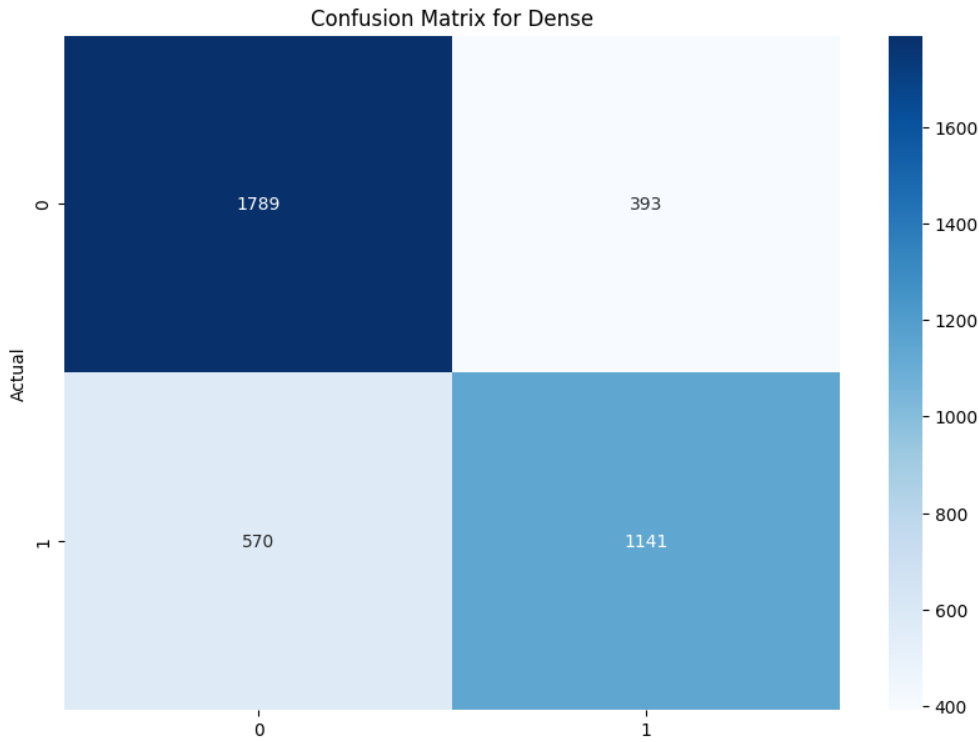

### Classification Report

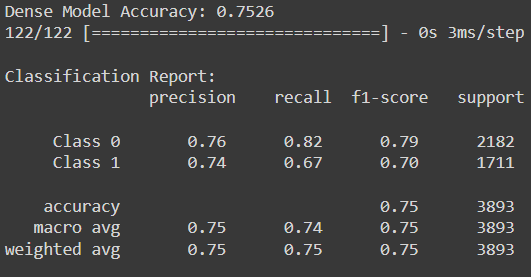

### 6.Sample predictions with YT comments

In [13]:
import numpy as np
from tensorflow.keras.models import load_model
import joblib

# Load the saved model
dense_model = load_model('dense_model.h5')

# Load the saved TF-IDF vectorizer
tfidf = joblib.load('tfidf_vectorizer.pkl')

# Function to predict sarcasm
def predict_sarcasm(comment, model, tfidf):
    # Preprocess the comment
    comment_processed = tfidf.transform([comment]).toarray()

    # Make the prediction
    prediction = model.predict(comment_processed)
    predicted_class = np.argmax(prediction)

    # Interpret the prediction
    if predicted_class == 1:
        return "The comment is sarcastic."
    else:
        return "The comment is not sarcastic."




In [15]:
# Example text usage
new_comment = "Oh, fantastic! Another meeting that could have been an email."
prediction_result = predict_sarcasm(new_comment, dense_model, tfidf)
print(prediction_result)

1/1 [==============================] - 0s 36ms/step
The comment is sarcastic.


In [11]:

new_comment = "john is a best content creator."
prediction_result = predict_sarcasm(new_comment, dense_model, tfidf)
print(prediction_result)

1/1 [==============================] - 0s 36ms/step
The comment is not sarcastic.


In [12]:
new_comment = "please hide your hidden talent from us."
prediction_result = predict_sarcasm(new_comment, dense_model, tfidf)
print(prediction_result)

1/1 [==============================] - 0s 22ms/step
The comment is sarcastic.


In [16]:

new_comment = "nice video."
prediction_result = predict_sarcasm(new_comment, dense_model, tfidf)
print(prediction_result)

1/1 [==============================] - 0s 30ms/step
The comment is not sarcastic.


In [26]:
new_comment = "Great, now I get to spend my weekend working"
prediction_result = predict_sarcasm(new_comment, dense_model, tfidf)
print(prediction_result)

1/1 [==============================] - 0s 24ms/step
The comment is sarcastic.
